# Automatic Gain Control (AGC)
This is a process commonly used to reduce amplitude range, helping to focus on structure.

It is implemented here as a division by the smoothed absolute value along each trace.

In [1]:
import torch
from seispro import agc

batch_size = 1
n_traces = 64
n_times = 128
data = ((torch.randn(batch_size, 1, n_times)
         + torch.arange(1, n_traces + 1).reshape(1, -1, 1)
         * torch.randn(batch_size, 1, n_times))
        * torch.arange(1, n_times+1).reshape(1, 1, -1)**2)

data_agc, scaling = agc(data, time_window_side_len=8)

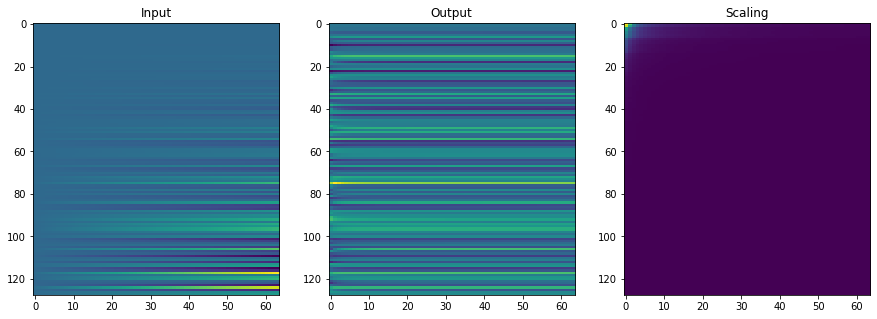

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

_, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(data[0].numpy().T, aspect='auto')
ax[0].set_title('Input')
ax[1].imshow(data_agc[0].numpy().T, aspect='auto')
ax[1].set_title('Output')
ax[2].imshow(scaling[0].numpy().T, aspect='auto')
ax[2].set_title('Scaling');